## Lab One: Visualization and Data Preprocessing

## Setup and Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
df = pd.read_csv('data/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Business Understanding

##### *Describe the purpose of the data set you selected (i.e. why was this data collected in the first place?).*

The dataset comprises 101,766 hospital records of inpatients diagnosed with diabetes who had hospital stays of 1-14 days, collected from 130 U.S. hospitals between 1999 and 2008. While evidence highlights the benefits of preventative and therapeutic interventions in improving outcomes for diabetic patients, diabetes care during hospital stays often appears inconsistent. This dataset was collected to study early readmission rates within 30 days of discharge, aiming to enhance patient outcomes, reduce morbidity and mortality, and lower hospital management costs.

**Source:** Strack, B., et al. (2014). *UCI Machine Learning Repository: Diabetes 130-US hospitals for years 1999–2008 Data Set.* Retrieved from [https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

##### *Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?*

Effectively predict early readmissions and determine the features important in determining this.

##### *How would you measure the effectiveness of a good prediction algorithm? Be specific.*

## Data Understanding

##### *Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.*

### Data Attributes

1. **ID Variables**
   - **encounter_id**: Unique identifier of an encounter.
   - **patient_nbr**: Unique identifier of a patient.  
2. **Demographic Variables**
   - **race**: Patient's race (Categorical Levels: Caucasian, Asian, African American, Hispanic, other).
   - **gender**: Patient's gender (Categorical Levels: male, female, unknown/invalid).
   - **age**: Age grouped in 10-year intervals (Categorical Levels: [0-10), [10-20), ..., [90-100)).
   - **weight**: Patient's weight in pounds (Categorical).  
3. **Admission and Discharge Details**
   - **admission_type_id**: Type of admission (Categorical: 9 integer levels representing e.g., Emergency, Urgent, Elective).
   - **discharge_disposition_id**: Type of discharge (Categorical: 29 integer levels representing e.g., Discharged to home, Expired).
   - **admission_source_id**: Source of admission (Categorical: 21 integer levels representing e.g., Physician Referral, Emergency Room).  
4. **Encounter Information**
   - **time_in_hospital**: Number of days in the hospital (Continuous).
   - **payer_code**: Payer for medical services (Categorical: 23 integer levels representing e.g., Blue Cross, Medicare).
   - **medical_specialty**: Specialty of admitting physician (Categorical: 84 integer levels representing e.g., Cardiology, Internal Medicine).  
5. **Medical History and Diagnostics**
   - **num_lab_procedures**: Number of lab tests performed (Continuous).
   - **num_procedures**: Number of procedures performed (excluding lab tests) (Continuous).
   - **num_medications**: Number of distinct medications administered (Continuous).
   - **number_outpatient**: Number of outpatient visits in the prior year (Continuous).
   - **number_emergency**: Number of emergency visits in the prior year (Continuous).
   - **number_inpatient**: Number of inpatient visits in the prior year (Continuous).
   - **diag_1**, **diag_2**, **diag_3**: Primary and secondary diagnoses (ICD-9 codes) (Categorical: integer values representing 848, 923, and 954 levels, respectively).
   - **number_diagnoses**: Total number of diagnoses recorded (Continuous).  
6. **Lab Results**
   - **max_glu_serum**: Glucose serum test results (Categorical Levels: >200, >300, normal, none).
   - **A1Cresult**: Hemoglobin A1c test results (Categorical Levels: >8, >7, normal, none).  
7. **Medications**
   - Variables for medications: Indicate whether prescribed and dosage changes (Categorical Levels: up, down, steady, no).
   - Drug Classes:
     - **Biguanides** reduce glucose production in the liver and improve insulin sensitivity.  
       - **metformin**: a first-line treatment for type 2 diabetes
     - **Meglitinides** stimulate insulin secretion but act faster and have a shorter duration compared to sulfonylureas. 
       - **repaglinide**
       - **nateglinide**
     - **Sulfonylureas** stimulate the pancreas to produce more insulin. These drugs are effective but are older and less commonly used today due to side effects like hypoglycemia and weight gain.  
       - **chlorpropamide**
       - **glimepiride**
       - **acetohexamide**
       - **glipizide**
       - **glyburide**
       - **tolbutamide**
       - **tolazamide**
     - **Thiazolidinediones (TZDs)** improve insulin sensitivity in muscle and fat tissue. They can have serious side effects, including weight gain and fluid retention. (They have been withdrawn in many markets due to evidence of liver toxicity.)
       - **pioglitazone**
       - **rosiglitazone**
       - **troglitazone**
     - **Alpha-Glucosidase Inhibitors** delay carbohydrate digestion and absorption in the intestines, reducing post-meal blood sugar spikes.
       - **acarbose**
       - **miglitol**
     - **DPP-4 Inhibitors** enhance incretin hormone levels to increase insulin release and decrease glucagon.
       - **citoglipton**: An unknown drug and potential error in the dataset; it may be a misspelling of *sitagliptin*.
     - **Insulin and Combinations**: Combination drugs combine two medications to simplify treatment and target multiple mechanisms for blood sugar control.
       - **insulin** directly supplements or replaces natural insulin in the body, essential for type 1 and advanced type 2 diabetes management.
       - **glyburide-metformin**
       - **glipizide-metformin**
       - **glimepiride-pioglitazone**
       - **metformin-rosiglitazone**
       - **metformin-pioglitazone**
     - **Non-Diabetes Medications**
       - **examide** is a diuretic primarily prescribed for cardiovascular or renal issues, not blood sugar control.  
8. **Outcome Variables**
   - **change**: Indicates if diabetic medications were changed during the encounter (Categorical Levels: change, no change).
   - **diabetesMed**: Indicates if diabetic medications were prescribed (Categorical Levels: yes, no).
   - **readmitted**: Readmission status (Target Classes: <30, >30, No).  

---

##### Metadata Categories

1. **admission_type_id**
   - 1: Emergency; 2: Urgent; 3: Elective; 4: Newborn; 5: Not Available; 6: NULL; 7: Trauma Center; 8: Not Mapped    
2. **discharge_disposition_id**
   - 1: Discharged to home; 2: Discharged/transferred to another short-term hospital; 3: Discharged/transferred to SNF; 4: Discharged/transferred to ICF; 5: Discharged/transferred to another type of inpatient care institution; 6: Discharged/transferred to home with home health service; 7: Left AMA; 8: Discharged/transferred to home under care of Home IV provider; 9: Admitted as an inpatient to this hospital; 10: Neonate discharged to another hospital for neonatal aftercare; 11: Expired; 12: Still patient or expected to return for outpatient services; 13: Hospice / home; 14: Hospice / medical facility; 15: Discharged/transferred within this institution to Medicare approved swing bed; 16: Discharged/transferred/referred to another institution for outpatient services; 17: Discharged/transferred/referred to this institution for outpatient services; 18: NULL; 19: Expired at home (Medicaid only, hospice); 20: Expired in a medical facility (Medicaid only, hospice); 21: Expired, place unknown (Medicaid only, hospice); 22: Discharged/transferred to another rehab facility including rehab units of a hospital; 23: Discharged/transferred to a long-term care hospital; 24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare; 25: Not Mapped; 26: Unknown/Invalid; 27: Discharged/transferred to a federal health care facility; 28: Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital; 29: Discharged/transferred to a Critical Access Hospital (CAH); 30: Discharged/transferred to another type of health care institution not defined elsewhere 
3. **admission_source_id**
   - 1: Physician Referral; 2: Clinic Referral; 3: HMO Referral; 4: Transfer from a hospital; 5: Transfer from a Skilled Nursing Facility (SNF); 6: Transfer from another health care facility; 7: Emergency Room; 8: Court/Law Enforcement; 9: Not Available; 10: Transfer from critical access hospital; 11: Normal Delivery; 12: Premature Delivery; 13: Sick Baby; 14: Extramural Birth; 15: Not Available; 17: NULL; 18: Transfer from Another Home Health Agency; 19: Readmission to Same Home Health Agency; 20: Not Mapped; 21: Unknown/Invalid; 22: Transfer from hospital inpatient/same facility resulting in a separate claim; 23: Born inside this hospital; 24: Born outside this hospital; 25: Transfer from Ambulatory Surgery Center; 26: Transfer from Hospice  


In [3]:
# # Display the variable metadata in a more readable table format
# metadata = pd.read_csv('data/diabetes+130-us+hospitals+for+years+1999-2008/IDS_mapping.csv')
# print(metadata.to_markdown(index=False))

### Data Cleaning

##### *Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.*

#### Missing Values

In [4]:
# Find `?` values and replace them with NaN
questionmark_sums = (df == '?').sum()
questionmark_sums_nonzero = questionmark_sums[questionmark_sums != 0]
questionmark_sums_nonzero

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [5]:
# Replace `?` with NaN
df_clean = df.replace('?', np.nan)

In [6]:
# Identify missing values
missing_sums = df_clean.isna().sum()
missing_sums_nonzero = missing_sums[missing_sums != 0]

# Calculate percentages
missing_percentages = (missing_sums_nonzero / len(df_clean)) * 100

# Create a DataFrame of missing counts and percentages
missing_summary = pd.DataFrame({
    'Missing Count': missing_sums_nonzero,
    'Missing Percentage': missing_percentages
}).sort_values(by='Missing Count', ascending=False)
missing_sums_nonzero

missing_summary

,Missing Count,Missing Percentage
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


In [7]:
# How many missing values are in each weight class?

# Define the order for weight classes
weight_order = [
    "[0-25)", "[25-50)", "[50-75)", "[75-100)", "[100-125)", 
    "[125-150)", "[150-175)", "[175-200)", ">200", np.nan
]

weight_counts = df_clean['weight'].value_counts(dropna=False)

# Reindex the counts based on the custom order
sorted_weight_counts = weight_counts.reindex(weight_order)
sorted_weight_counts

weight
[0-25)          48
[25-50)         97
[50-75)        897
[75-100)      1336
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
>200             3
NaN          98569
Name: count, dtype: int64

In [8]:
# Let's look at age. The low weights will likely be young patients.

df_clean['age'].value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [9]:
under_50_lbs = ((df_clean['weight'] == '[0-25)') | (df_clean['weight'] == '[25-50)')).sum()
under_10_yrs = (df_clean['age'] == '[0-10)').sum()

print(f'There are {under_50_lbs} patients under 50 lbs and {under_10_yrs} patients under 10 years old.')

There are 145 patients under 50 lbs and 161 patients under 10 years old.


In [10]:
# Let's look closer at max_glu_serum representing glucose serum test results
# One of the categorical levels is `none`. This test is not conducted on most patients.

df_clean['max_glu_serum'].value_counts(dropna=False)

max_glu_serum
NaN     96420
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [11]:
# Let's look at A1Cresult
# One of the categorical levels is `none`. This test is not conducted on most patients.

df_clean['A1Cresult'].value_counts(dropna=False)

A1Cresult
NaN     84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

In [12]:
df_clean['medical_specialty'].value_counts(dropna=False)[df_clean['medical_specialty'].value_counts(dropna=False)>1000]

medical_specialty
NaN                           49949
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Name: count, dtype: int64

In [13]:
df_clean['payer_code'].value_counts(dropna=False)

payer_code
NaN    40256
MC     32439
HM      6274
SP      5007
BC      4655
MD      3532
CP      2533
UN      2448
CM      1937
OG      1033
PO       592
DM       549
CH       146
WC       135
OT        95
MP        79
SI        55
FR         1
Name: count, dtype: int64

In [14]:
df_clean['race'].value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [15]:
df_clean['diag_3'].value_counts(dropna=False)[df_clean['diag_3'].value_counts(dropna=False)>1400]

diag_3
250    11555
401     8289
276     5175
428     4577
427     3955
414     3664
496     2605
403     2357
585     1992
272     1969
599     1941
NaN     1423
Name: count, dtype: int64

In [16]:
print(f'Variables with missing values are: {', '.join(missing_summary.index)}.')

Variables with missing values are: weight, max_glu_serum, A1Cresult, medical_specialty, payer_code, race, diag_3, diag_2, diag_1.


##### Strategies for dealing with missing data:

- It seems that for features with a high percentage of missing values (e.g. weight, max_glu_serum, A1Cresult), we should remove these features from our analysis.   
- However, is there a way to examine the rows with these values to determine their predictive power? It may be that prediction can be improved significantly with these. Part of the conclusion and recommendation may be for hospitals to include these test for all diabetes patients.
  - Check correlations between these variables and the target variable for rows where data is available.
  - Use a random forest model to evaluate feature importance to see if these features contribute significantly to prediction when included.
  - Investigate differences in the target variable for patients with and without these values.
  - Consider that these may test for long term markers rather than parameters critical for acute care. Also, they may be done at routine doctors appointments and they are avoided during acute treatment to avoid duplication.    
- It would be interesting to investigate if a certain payer code or medical specialty for which we have records are associated with lower rates of treatment or higher rates of re-admission.
  - Use bar plots or heat maps to look into how payer codes and medical specialties are distributed across patients with different outcomes (e.g. re-admission rates).
  - Certain payer codes or specialties may correlate with lower rates of tests or treatments, which could indicate disparities in care.  
- Features with < 3% missing values (e.g. race, diag_3, diag_2, diag_1) imputation seems like a viable option, either using the mode or something more sophisticated like a multi-class classification technique.  

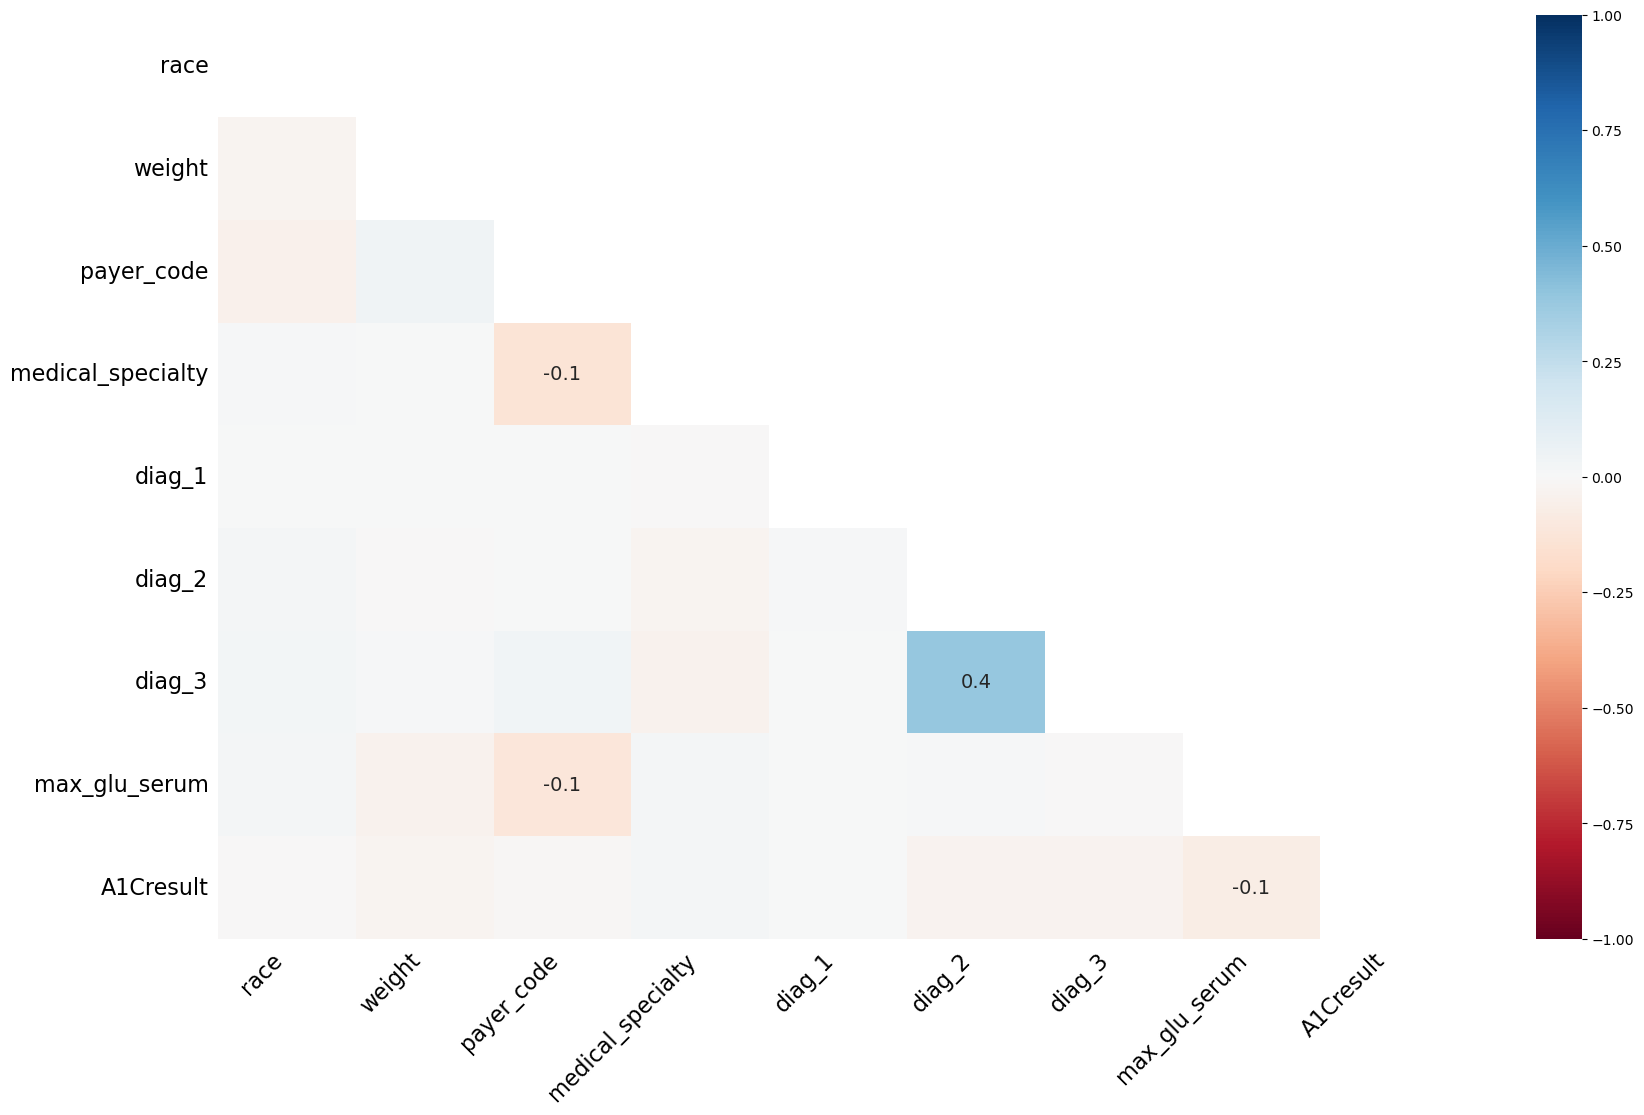

In [43]:
import missingno as msno

# Visualize missing data as a heatmap
msno.heatmap(df_clean)
plt.show()

The heatmap displays correlations in the patterns of missingness between variables. A positive correlation of 0.4 between diag_2 and diag_3 indicates that if a record is missing a value for diag_2, there is an increased likelihood that it is also missing a value for diag_3. This relationship suggests that if diag_2 is missing, we may be able to use diag_3 (if available) to inform our imputation strategy.  
The lack of strong correlations between most other variables suggests their missingness is likely independent of one another. However, negative correlations (e.g., -0.1 between medical_specialty and max_glu_serum) indicate a weak inverse relationship, meaning that when one column has a missing value, the other is slightly less likely to be missing.

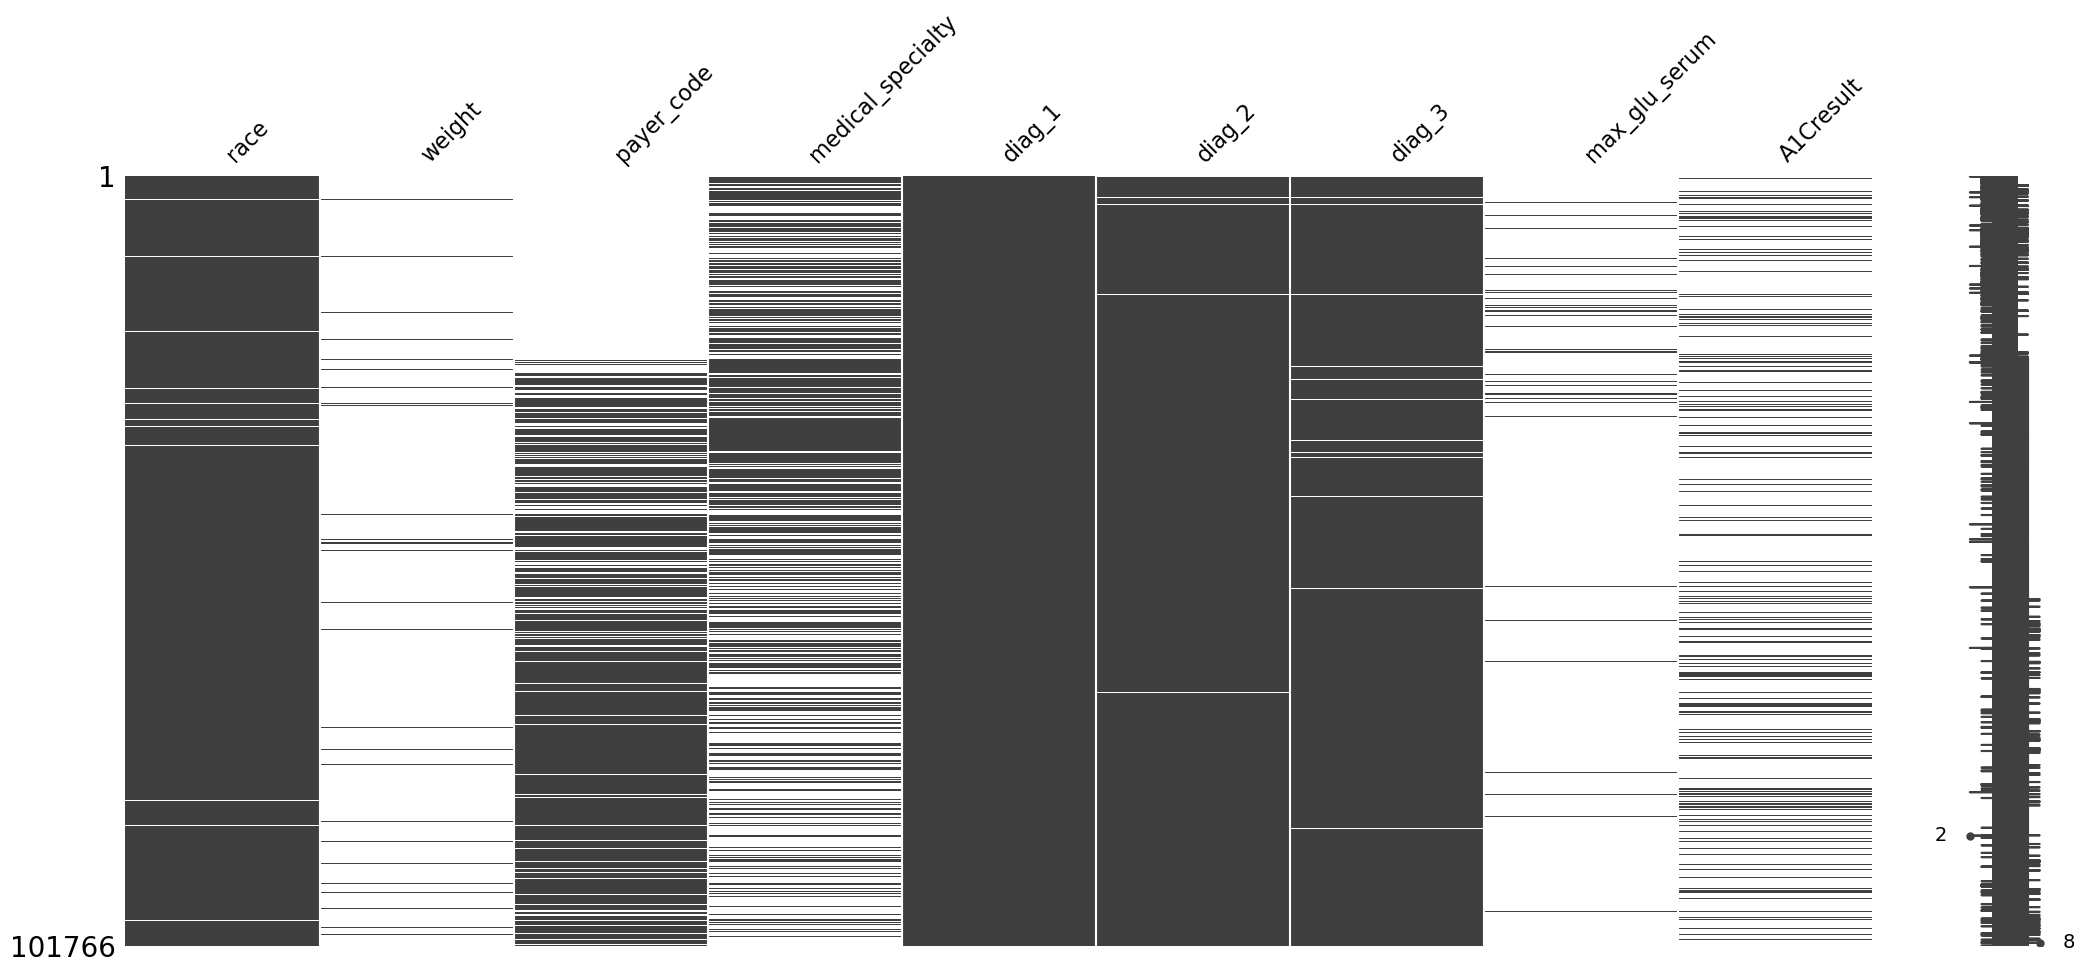

In [18]:
# Visualize missing data as a matrix
msno.matrix(df_clean.loc[:, df_clean.isnull().any()])
plt.show()

This bar graph displays records across the full dataset, with missing values shown in white. There doesn’t appear to be a strong indication that specific rows are disproportionately affected by missingness. Patterns of missing values seem fairly distributed across rows without obvious clustering. This suggests that while variable-level missingness is significant, row-level missingness may not require targeted removal or specific handling.The dendrogram provides insights into relationships between variables based on their missingness patterns. Diagnosis codes (diag_1, diag_2, diag_3) cluster together, indicating shared trends in missing values, which may reflect relationships in the data collection process. Variables like max_glu_serum and weight also cluster, though this may be less meaningful due to the high proportion of missing data in these columns.

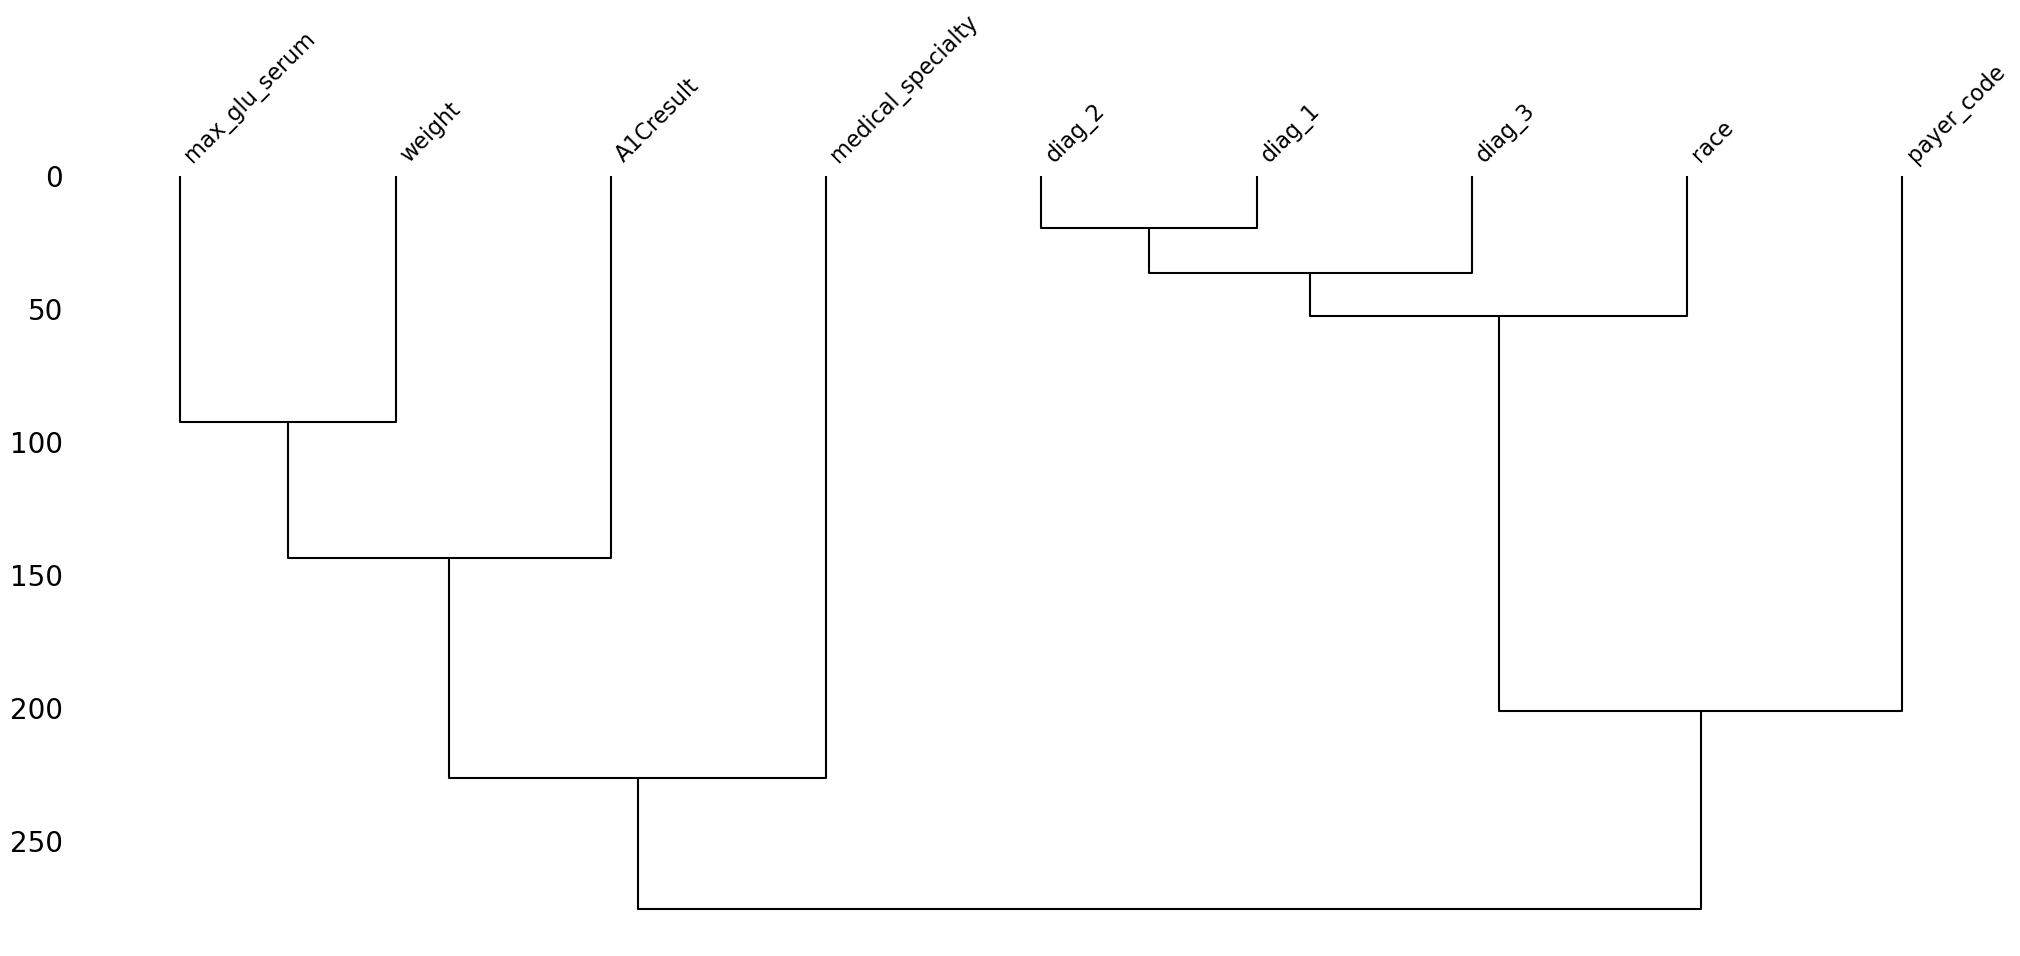

In [19]:
# Visualize dendrogram for missingness correlations
msno.dendrogram(df_clean.loc[:, df_clean.isnull().any()])
plt.show()

The dendrogram provides insights into relationships between variables based on their missingness patterns. Diagnosis codes (diag_1, diag_2, diag_3) cluster together, indicating shared trends in missing values, which may reflect relationships in the data collection process. Variables like max_glu_serum and weight also cluster, though this may be less meaningful due to the high proportion of missing data in these columns.

#### Duplicates

In [20]:
duplicate_count = df_clean.duplicated().sum()
print(f'The dataset has {duplicate_count} duplicate records.')

The dataset has 0 duplicate records.


#### Remove ID variable: 'encounter_id'

In [21]:
# Verify that encounter_id is unique for each record.
df_clean['encounter_id'].nunique() == len(df_clean)

True

In [39]:
if 'encounter_id' in df_clean:
    del df_clean['encounter_id']

# if 'patient_nbr' in df_clean:
#     del df_clean['patient_nbr']

print( df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   patient_nbr               101766 non-null  category
 1   race                      99493 non-null   object  
 2   gender                    101766 non-null  object  
 3   age                       101766 non-null  object  
 4   weight                    3197 non-null    object  
 5   admission_type_id         101766 non-null  category
 6   discharge_disposition_id  101766 non-null  category
 7   admission_source_id       101766 non-null  category
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                61510 non-null   object  
 10  medical_specialty         51817 non-null   object  
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

In [23]:
# Convert categorical variables `patient_nbr`, `admission_type_id`, `discharge_disposition_id`, `admission_source_id` from integer to object datatype
categoricalInt_cols = ['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df_clean[categoricalInt_cols] = df_clean[categoricalInt_cols].astype('category')
df_clean[['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']].dtypes

patient_nbr                 category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
dtype: object

### Statistical summaries of the features

##### *Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.*

In [24]:
# Summary statistics of the numerical features

# Calculate basic statistics
desc = df_clean.describe()  # Includes count, mean, std, 5-number summary
modes_num = df_clean.mode(numeric_only=True).iloc[0]  # Get the first mode for each column
variances = df_clean.var(numeric_only=True)
ranges = df_clean.max(numeric_only=True) - df_clean.min(numeric_only=True)

# Create a summary DataFrame
num_stats_df = pd.DataFrame({
    'Count': desc.loc['count'],
    'Mean': desc.loc['mean'],
    'Std': desc.loc['std'],
    'Min': desc.loc['min'],
    '25%': desc.loc['25%'],
    'Median': desc.loc['50%'],
    '75%': desc.loc['75%'],
    'Max': desc.loc['max'],
    'Range': ranges,
    'Variance': variances,
    'Mode': modes_num
})

# Rearrange and clean up for better presentation
num_stats_df = num_stats_df[['Count', 'Mean', 'Std', 'Variance', 'Min', '25%', 'Median', '75%', 'Max', 'Range', 'Mode']]
num_stats_df.reset_index(inplace=True)  # Optional: Keep variable names as a column
num_stats_df.rename(columns={'index': 'Variable'}, inplace=True)

# Display the final DataFrame
num_stats_df


,Variable,Count,Mean,Std,Variance,Min,25%,Median,75%,Max,Range,Mode
0,time_in_hospital,101766.0,4.395987,2.985108,8.910868,1.0,2.0,4.0,6.0,14.0,13,3
1,num_lab_procedures,101766.0,43.095641,19.674362,387.080530,1.0,31.0,44.0,57.0,132.0,131,1
2,num_procedures,101766.0,1.339730,1.705807,2.909777,0.0,0.0,1.0,2.0,6.0,6,0
3,num_medications,101766.0,16.021844,8.127566,66.057332,1.0,10.0,15.0,20.0,81.0,80,13
4,number_outpatient,101766.0,0.369357,1.267265,1.605961,0.0,0.0,0.0,0.0,42.0,42,0
5,number_emergency,101766.0,0.197836,0.930472,0.865779,0.0,0.0,0.0,0.0,76.0,76,0
6,number_inpatient,101766.0,0.635566,1.262863,1.594824,0.0,0.0,0.0,1.0,21.0,21,0
7,number_diagnoses,101766.0,7.422607,1.933600,3.738810,1.0,6.0,8.0,9.0,16.0,15,9


In [25]:
# Summary statistics of the categorical features

# Calculate basic statistics
desc_cat = df_clean.describe(include=['object', 'category'])  # Includes count, unique, top, freq
top_percentage = (desc_cat.loc['freq'] / desc_cat.loc['count'] * 100).round(2)

# Create a summary DataFrame
cat_stats_df = pd.DataFrame({
    'Count': desc_cat.loc['count'],
    'Unique': desc_cat.loc['unique'],
    'Top': desc_cat.loc['top'],
    'Freq': desc_cat.loc['freq'],
    'Top %': top_percentage
})

# Rearrange and clean up for better presentation
cat_stats_df.reset_index(inplace=True)  # Optional: Keep variable names as a column
cat_stats_df.rename(columns={'index': 'Variable'}, inplace=True)

# Display the final DataFrame
cat_stats_df

,Variable,Count,Unique,Top,Freq,Top %
0,patient_nbr,101766,71518,88785891,40,0.039306
1,race,99493,5,Caucasian,76099,76.486788
2,gender,101766,3,Female,54708,53.758623
3,age,101766,10,[70-80),26068,25.615628
4,weight,3197,9,[75-100),1336,41.789177
5,admission_type_id,101766,8,1,53990,53.053083
6,discharge_disposition_id,101766,26,1,60234,59.188727
7,admission_source_id,101766,17,7,57494,56.496276
8,payer_code,61510,17,MC,32439,52.737766
9,medical_specialty,51817,72,InternalMedicine,14635,28.243627


In [26]:
# Find how many patients are have more than one encounter.
repeated_patients = len(df_clean['patient_nbr'].value_counts(dropna=False)[df_clean['patient_nbr'].value_counts(dropna=False)>1])
repeated_patients

16773

patient_nbr is not unique for each record in the dataset indicating that there are repeated measures. 16,773 patients have between 2 and 40 encounters.

In [27]:
# Verify that values in 'examide' and 'citoglipton' are 100% 'No' across the full dataset
print(df_clean['examide'].value_counts())
print(df_clean['citoglipton'].value_counts())

examide
No    101766
Name: count, dtype: int64
citoglipton
No    101766
Name: count, dtype: int64


We should be able to eliminate these variables, since they aren't offering any insight.

In [28]:
# Remove examide and citoglipton from the dataset.
if 'examide' in df_clean:
    del df_clean['examide']

if 'citoglipton' in df_clean:
    del df_clean['citoglipton']

print( df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   patient_nbr               101766 non-null  category
 1   race                      99493 non-null   object  
 2   gender                    101766 non-null  object  
 3   age                       101766 non-null  object  
 4   weight                    3197 non-null    object  
 5   admission_type_id         101766 non-null  category
 6   discharge_disposition_id  101766 non-null  category
 7   admission_source_id       101766 non-null  category
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                61510 non-null   object  
 10  medical_specialty         51817 non-null   object  
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

#### Outliers

In [29]:
# Calculate IQR and outlier bounds
num_stats_df['IQR'] = num_stats_df['75%'] - num_stats_df['25%']  # Interquartile Range
num_stats_df['Lower_IQR_Bound'] = num_stats_df['25%'] - 1.5 * num_stats_df['IQR']
num_stats_df['Upper_IQR_Bound'] = num_stats_df['75%'] + 1.5 * num_stats_df['IQR']

outliers = {} # Empty dictionary to store outliers for each variable
total_rows = len(df_clean)

for var in df_clean.select_dtypes(include='number').columns:
    # Get lower and upper bounds for the variable
    lower_bound = num_stats_df.loc[num_stats_df['Variable'] == var, 'Lower_IQR_Bound'].values[0]
    upper_bound = num_stats_df.loc[num_stats_df['Variable'] == var, 'Upper_IQR_Bound'].values[0]
    
    # Find outliers
    outliers[var] = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)][var]

# Summarize outliers
outlier_counts = {var: len(outlier_values) for var, outlier_values in outliers.items()}
outlier_proportions = {var: round((count / total_rows) * 100, 2) for var, count in outlier_counts.items()}  # Convert to percentage and round

# Create a summary DataFrame
outliers_summary_df = pd.DataFrame({
    'Variable': outlier_counts.keys(),
    'Outlier Count': outlier_counts.values(),
    'Outlier Proportion (%)': outlier_proportions.values()  # Updated to percentage
})

outliers_summary_df

,Variable,Outlier Count,Outlier Proportion (%)
0,time_in_hospital,2252,2.21
1,num_lab_procedures,143,0.14
2,num_procedures,4954,4.87
3,num_medications,2557,2.51
4,number_outpatient,16739,16.45
5,number_emergency,11383,11.19
6,number_inpatient,7049,6.93
7,number_diagnoses,281,0.28


Suspected outliers were identified using the interquartile range (IQR) method: values below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR were classified as outliers. Variables related to hospital visits (e.g. number_outpatient, number_emergency, number_inpatient) exhibited a higher proportion of outliers, with more than 5% of observations flagged. These variables had low mean, median, and mode values, but a small subset of patients had disproportionately high numbers of visits.  
Other numeric variables had fewer than 5% of observations defined as outliers. It may be worth examining potential correlations among the hospital visit variables, as certain patients could be more prone to frequent hospital visits and associated interventions.

### Visualization of the attributes

##### *Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.*

##### *Explore relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

/var/folders/xc/xy2drgvd7_18v0mjfy9sz8mc0000gn/T/ipykernel_85354/2840923239.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1))


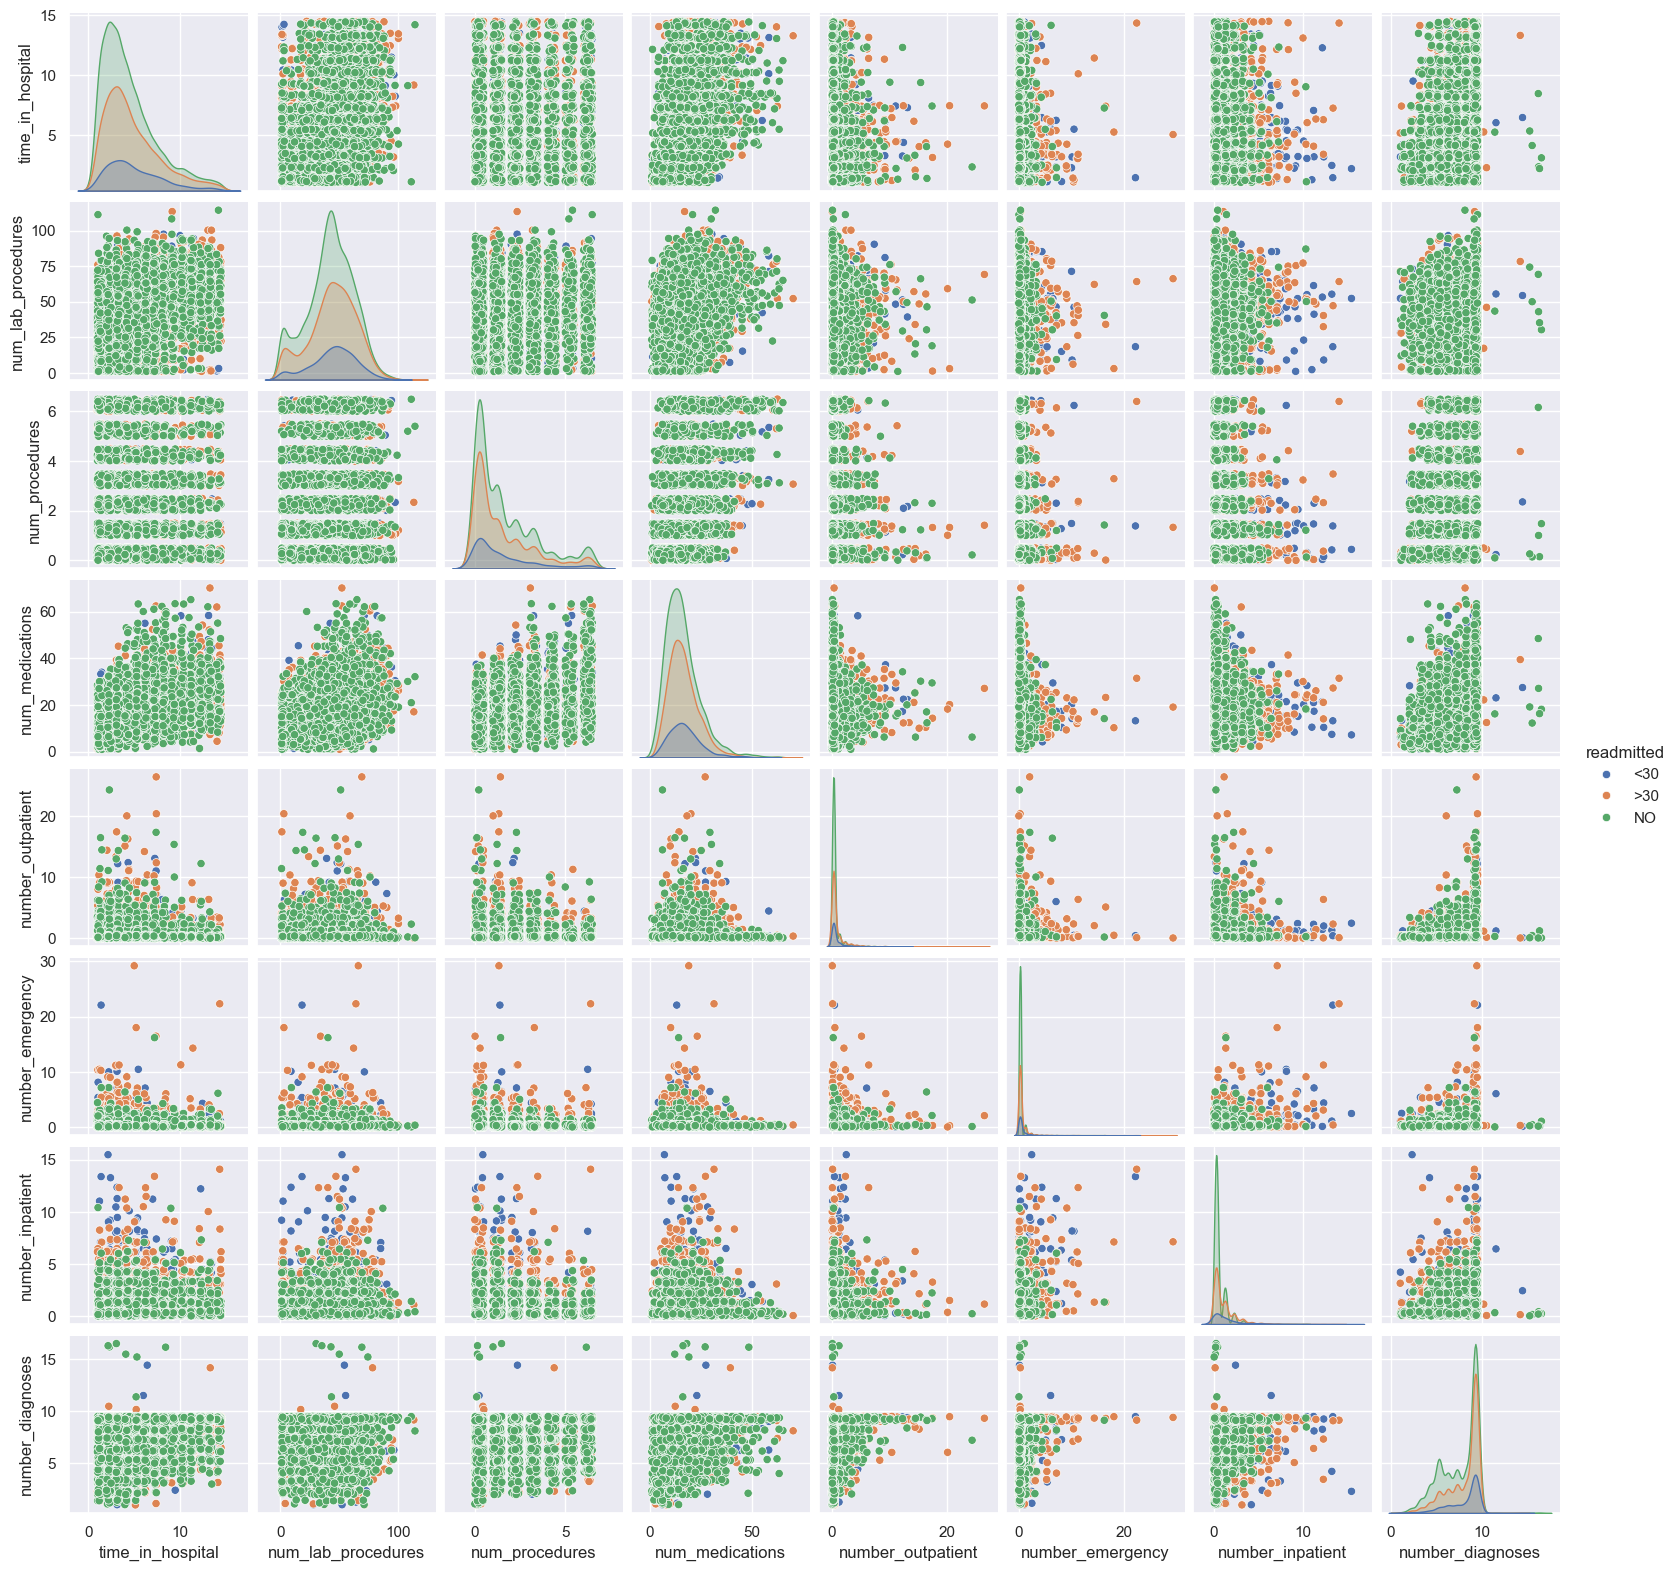

In [37]:
# Scatter plot matrix of the numeric variables

# Sample 10% of the 100K record dataset
sample_size = int(0.1 * len(df_clean))

# Perform stratified sampling  to ensure all 'readmitted' classes are represented and reset the index
df_sampled = (
    df_clean.groupby('readmitted', group_keys=False)
    .apply(lambda x: x.sample(frac=0.1))
    .reset_index(drop=True)
)

# Ensure the 'readmitted' column is present explicitly
df_sampled = df_sampled.loc[:, df_clean.columns]

# Add jitter to numeric variables
df_sampled_jittered = df_sampled.copy()
numeric_cols = df_sampled.select_dtypes(include=['int64']).columns

df_sampled_jittered[numeric_cols] = df_sampled_jittered[numeric_cols].values + \
    np.random.rand(len(df_sampled_jittered), len(numeric_cols)) / 2

# Create the pairplot
sns.pairplot(df_sampled_jittered, hue="readmitted", height=2);


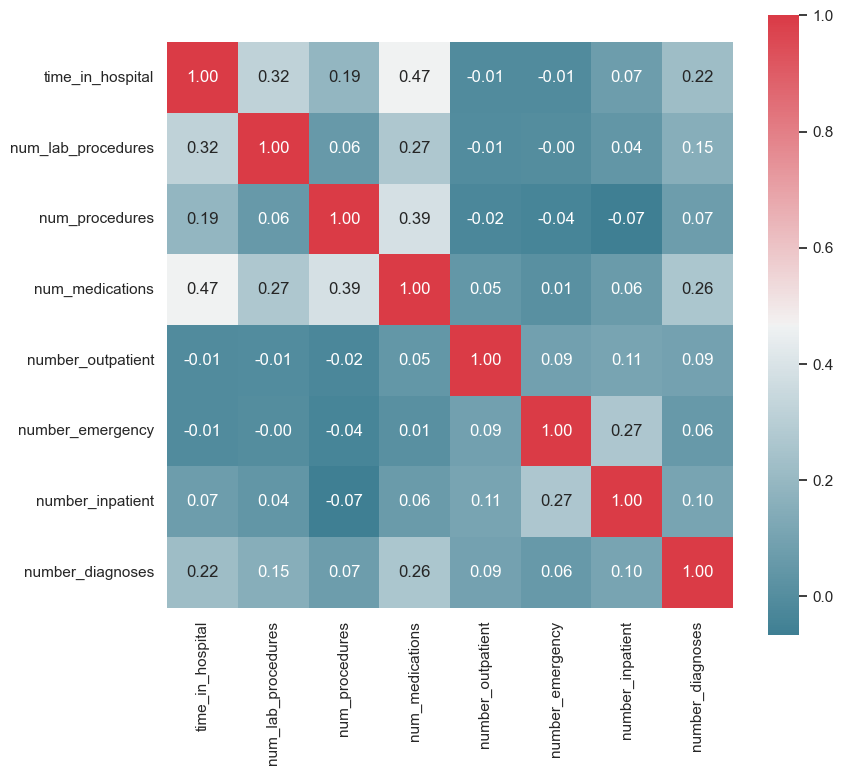

In [33]:
# Select only numeric columns for the correlation matrix
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix using seaborn heatmap
sns.set(style="darkgrid")  # Set the style

# Set the colormapping


# Create the plot
f, ax = plt.subplots(figsize=(9, 9))  # Figure and axes
sns.heatmap(corr_matrix,
            annot=True,         # Plot numeric annotations
            fmt=".2f",          # Format for annotations
            cmap=cmap,          # Colormap
            square=True,        # Keep cells square
            cbar_kws={"shrink": 0.8},  # Colorbar customization
            ax=ax)              # Use the same axis

# Adjust layout
f.tight_layout()
plt.show()

##### *Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

##### *Are there other features that could be added to the data or created from existing features? Which ones?*

#### Group drugs into categories for simplicity.

##### *Additional analyses (e.g. implement dimensionality reduction, then visualize and interpret the results).*

In [ ]:
   - Drug Classes:
     - **Biguanides** reduce glucose production in the liver and improve insulin sensitivity.  
       - **metformin**: a first-line treatment for type 2 diabetes
     - **Meglitinides** stimulate insulin secretion but act faster and have a shorter duration compared to sulfonylureas. 
       - **repaglinide**
       - **nateglinide**
     - **Sulfonylureas** stimulate the pancreas to produce more insulin. These drugs are effective but are older and less commonly used today due to side effects like hypoglycemia and weight gain.  
       - **chlorpropamide**
       - **glimepiride**
       - **acetohexamide**
       - **glipizide**
       - **glyburide**
       - **tolbutamide**
       - **tolazamide**
     - **Thiazolidinediones (TZDs)** improve insulin sensitivity in muscle and fat tissue. They can have serious side effects, including weight gain and fluid retention. (They have been withdrawn in many markets due to evidence of liver toxicity.)
       - **pioglitazone**
       - **rosiglitazone**
       - **troglitazone**
     - **Alpha-Glucosidase Inhibitors** delay carbohydrate digestion and absorption in the intestines, reducing post-meal blood sugar spikes.
       - **acarbose**
       - **miglitol**
     - **DPP-4 Inhibitors** enhance incretin hormone levels to increase insulin release and decrease glucagon.
       - **citoglipton**: An unknown drug and potential error in the dataset; it may be a misspelling of *sitagliptin*.
     - **Insulin and Combinations**: Combination drugs combine two medications to simplify treatment and target multiple mechanisms for blood sugar control.
       - **insulin** directly supplements or replaces natural insulin in the body, essential for type 1 and advanced type 2 diabetes management.
       - **glyburide-metformin**
       - **glipizide-metformin**
       - **glimepiride-pioglitazone**
       - **metformin-rosiglitazone**
       - **metformin-pioglitazone**
     - **Non-Diabetes Medications**
       - **examide** is a diuretic primarily prescribed for cardiovascular or renal issues, not blood sugar control.  


In [46]:
# This isn't working yet...
df_drug_by_class = df_clean.copy()

# Define drug classes
drug_classes = {
    'Metformin': ['metformin'],
    'Meglitinides': ['repaglinide', 'nateglinide'],
    'Sulfonylureas': ['chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide'],
    'TZDs': ['pioglitazone', 'rosiglitazone', 'troglitazone'],
    'AGIs': ['acarbose', 'miglitol'],
    'Insulin': ['insulin'],
    'Sulfonylureas_Metformin': ['glyburide-metformin', 'glipizide-metformin'], 
    'TZDs_Metformin': ['metformin-rosiglitazone', 'metformin-pioglitazone'],
    'Sulfonylureas_TZDs': ['glimepiride-pioglitazone']
}

# Create columns for each drug class
for class_name, drugs in drug_classes.items():
    # Check the status of all drugs in the class for each patient
    df_drug_by_class[class_name] = df_clean[drugs].apply(
        lambda row: 'up' if 'up' in row.values else
                    'down' if 'down' in row.values else
                    'stable' if 'stable' in row.values else
                    'no', axis=1
    )

# Confirm no patient is taking multiple drugs in a class with conflicting statuses
for class_name, drugs in drug_classes.items():
    df_drug_by_class[f'{class_name}_conflict'] = df_drug_by_class[drugs].nunique(axis=1) > 1

# View the result
df_drug_by_class.head()


,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,Sulfonylureas_TZDs,Metformin_conflict,Meglitinides_conflict,Sulfonylureas_conflict,TZDs_conflict,AGIs_conflict,Insulin_conflict,Sulfonylureas_Metformin_conflict,TZDs_Metformin_conflict,Sulfonylureas_TZDs_conflict
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,no,False,False,False,False,False,False,False,False,False
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,no,False,False,False,False,False,False,False,False,False
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,no,False,False,True,False,False,False,False,False,False
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,no,False,False,False,False,False,False,False,False,False
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,no,False,False,True,False,False,False,False,False,False


In [ ]:
# Drop the individual drug columns
columns_to_drop = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide', 'pioglitazone', 'rosiglitazone', 'troglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'glimepiride-pioglitazone']
df_drug_by_class = df_drug_by_class.drop(columns=columns_to_drop)
df_drug_by_class.info()

#### Create a data subset to explore the importance of variables with a high proportion of missing values

In [30]:
missing_summary

,Missing Count,Missing Percentage
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


In [38]:
# Filter rows with observations for max_glu_serum and A1Cresult
df_subset = df_clean[(~df_clean['max_glu_serum'].isna()) & (~df_clean['A1Cresult'].isna())]

# What is the length of the data subset?
print(f'There are {len(df_subset)} records with glucose and AIC test results.')

# After filtering, how many rows still have missing values
df_subset.isna().sum()[df_subset.isna().sum()!=0]

298


race                   6
weight               298
payer_code           240
medical_specialty    154
diag_2                 1
diag_3                 3
dtype: int64

In [40]:
# Remove columns with > 5% missing.
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
df_subset = df_subset.drop(columns=columns_to_drop)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 162 to 101088
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   patient_nbr               298 non-null    category
 1   race                      292 non-null    object  
 2   gender                    298 non-null    object  
 3   age                       298 non-null    object  
 4   admission_type_id         298 non-null    category
 5   discharge_disposition_id  298 non-null    category
 6   admission_source_id       298 non-null    category
 7   time_in_hospital          298 non-null    int64   
 8   num_lab_procedures        298 non-null    int64   
 9   num_procedures            298 non-null    int64   
 10  num_medications           298 non-null    int64   
 11  number_outpatient         298 non-null    int64   
 12  number_emergency          298 non-null    int64   
 13  number_inpatient          298 non-null    int64   

In [41]:
# plot max_glu_serum and A1C result split by class of readmittance